# Modelos de redes aleatorias

![Vonfrisch, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Erdos_generated_network-p0.01.jpg/640px-Erdos_generated_network-p0.01.jpg)

*Computación Social y Personalización*

*Grado en Ciencia de Datos e Inteligencia Artificial*

**Sergio D'Antonio Maceiras**

[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

Librerías necesarias para ejecutar esta libreta:

- networkx@2.8
- matplotlib@3.5.1
- seaborn@0.11.2
- scipy@1.7.3

In [1]:
%pip install networkx
%pip install scipy 
%pip install seaborn


import networkx as nx
import random
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Supongamos que hemos calculado uno o más estadísticos descriptivos para una red $G$. Por ejemplo, hemos calculado el grado medio $\left<k\right>$, o la distribución de grados $Pr(k)$, o el coeficiente de clustering (global) $C$, o la distancia geodésica media $\left<\ell\right>$. ¿Cómo interpretamos los valores que toman estos estadísticos? ¿Qué valores son "grandes" o "pequeños", "típicos" o "inusuales"? Los **modelos de redes aleatorias** nos pueden ayudar a responder a estas preguntas, entendiendo la magnitud y los valores obtenidos comparándolos con un punto de referencia.

Supongamos que estamos analizando el coeficiente global de clustering $C$ para una red social de delfines $G$. Utilizando un modelo de grafo aleatorio $M$ que parametrizaremos para ser similar a $G$ podemos generar muchas redes sintéticas y calcular cada uno de sus coeficientes de clustering. Estos valores sintéticos representan una distribución de referencia $Pr(C)$ para determinar si $C$ es estadísticamente similar y, entonces, concluir que las hipótesis que subyacen al modelo $M$ son suficientes para explicar el valor del coeficiente de clustering de nuestra red.

# El modelo Erdös-Rényi

El **modelo de grafo aleatorio Erdös-Rényi**, a veces llamado **grafo ER** o simplemente $G(n, p)$, es el modelo de grafo aleatorio más antiguo y sencillo. Este modelo construye una red con $n$ nodos y con una probabilidad $p$ de que exista cualquier arista $(i,j)\in E$. Esto quiere decir que las aristas son variables aleatorias independientes e identicamente distribuidas (iid).

Si pensamos en su representación en forma de matriz de adyacencia, podemos definir

$$
\forall i>j, A_{ij}=A_{ji}=\begin{cases}
 1 & \text{ con probabilidad } p \\
 0 & \text{ en otro caso }
\end{cases}
$$

## Generando redes ER

Dada la simplicidad del modelo, es muy sencillo construir un generador de redes ER. Basta con seguir los siguientes pasos:

1. Inicializar un grafo vacío $G$ con $n$ nodos.
2. Para cada uno de los $\binom{n}{2}$ pares $i, j$ de nodos, obtener un valor aleatorio uniforme $r$.
3. Si $r\leq p$, añadir al grafo la arista $(i,j)$.

Nosotros vamos a usar la librería **NetworkX** para generar grafos ER, y para ello usaremos la función generadora [`erdos_renyi_graph`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html). Para tener una idea del tipo de redes que genera vamos a representar gráficamente la red ER generada.

In [2]:
n = "15"

In [3]:
p = 0.5

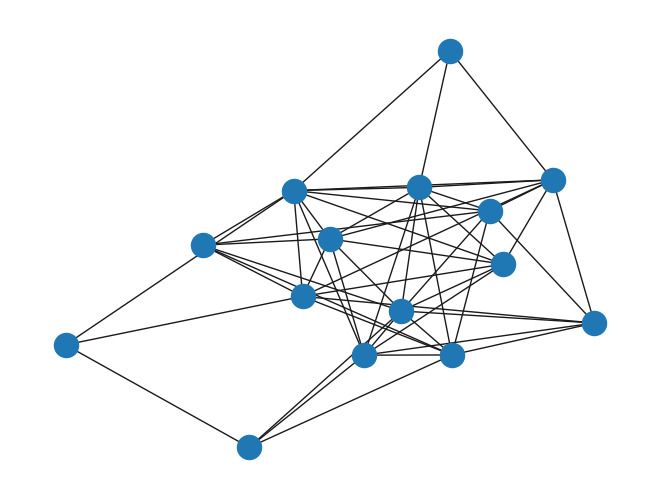

In [4]:
grafo = nx.erdos_renyi_graph(n=int(n), p=p, seed=42)
nx.draw(grafo)

## Propiedades de las redes ER

Los grafos aleatorios ER no se consideran modelos realistas de redes, pero son un modelo de referencia útil. Para algunas estadísticas descriptivas, la aleatoriedad y la baja densidad son capaces de producir una estructura interesante. A alto nivel, los grafos ER tienen las siguientes propiedades:

- La conectividad es **homogénea** y se rige totalmente por el parámetro de **densidad** de las aristas $p$. Éstas son independientes e idénticamente distribuidas (iid).
- La distribución de grados $Pr(k)$ es una distribución de *Poisson* con media $c = p(n - 1)$, que es una distribución de **baja varianza**.
- El diámetro y la distancia geodésica media son $O(\log n)$, lo que hace que los grafos ER sean "**de mundo pequeño**" por lo que existen caminos cortos entre la mayoría de pares de nodos.
- El coeficiente de clustering es $C=O(1/n)$, lo que significa que hay muy pocos triángulos. Recuerda, esto significa que los vecinos de un nodo no tienden a agruparse entre sí.
- El mayor componente conectado (LCC) es proporcional al tamaño de la red $O(n)$ cuando $c > 1$ y es infinitamente pequeño, conteniendo $O(1)$ nodos, cuando $c < 1$.

A continuación vamos a centrarnos en estas propiedades de manera individual.

### Distribución de grados

Como hemos dicho anteriormente, la distribución de probabilidad del grado $Pr(k)$ de una red ER sigue una distribución de Poisson con media $c=p(n-1)$. Vamos a representar gráficamente estas distribuciones en función de distintos valores de grado medio $c$:

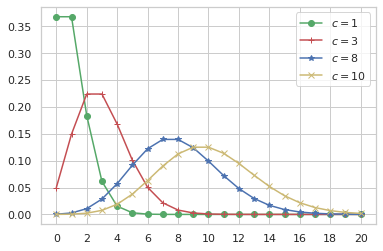

In [ ]:
steps = list(range(0, 21))
plt.plot(steps, [stats.poisson.pmf(s, 1) for s in steps], 'go-', label='$c=1$')
plt.plot(steps, [stats.poisson.pmf(s, 3) for s in steps], 'r+-', label='$c=3$')
plt.plot(steps, [stats.poisson.pmf(s, 8) for s in steps], 'b*-', label='$c=8$')
plt.plot(steps, [stats.poisson.pmf(s, 10) for s in steps], 'yx-', label='$c=10$')
plt.legend(loc="upper right")
plt.xticks(list(range(0, 21, 2)))
plt.show()

Para comprobarlo de manera empírica generamos una red ER con 101 nodos. Si queremos que tenga un grado medio $c=3$ tendremos que fijar la probabilidad de arista en $p=\frac{c}{n-1}$. Calculamos la distribución de probabilidad del grado de nuestra red ER (histograma) y superponemos la distribución de Poisson de media $c=3$.

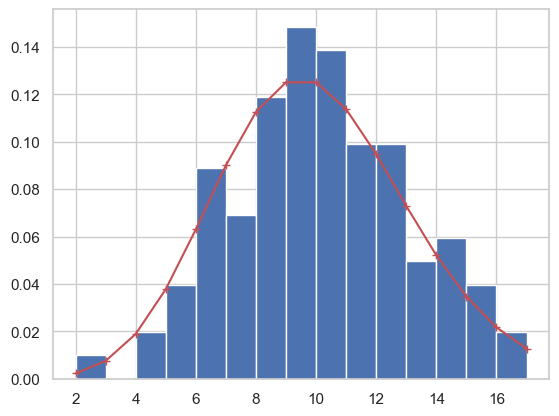

In [ ]:
c=10.0
n = 101
p = c/(n-1)

g = nx.erdos_renyi_graph(n, p, seed=137)
grados = [d for n, d in g.degree()]
min_g = min(grados)
max_g = max(grados)
xs = list(range(min_g, max_g+1))
plt.hist(grados, bins=xs, density=True)
plt.plot(xs, [stats.poisson.pmf(s, c) for s in xs], 'r+-')
plt.show()

### Diámetro y camino geodésico medio

Para analizar empíricamente estas métricas vamos a generar un número $N$ de redes ER, variando el tamaño de las mismas con respecto al número $n$ de nodos. Al mismo tiempo generaremos diferentes probabilidades de arista $p$. **Tenemos que asegurarnos** de que el grafo es conexo para calcular estas métricas, así que las calcularemos sobre la componente gigante de cada red.


In [ ]:
N=5
xs = list(range(10, 101, 10))*5
redes = [nx.erdos_renyi_graph(n, random.choice([1, 2, 3, 4])/(n-1.0)) for n in xs]
diametros = list(map(lambda g: nx.diameter(g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])), redes))
geo = list(map(lambda g: nx.average_shortest_path_length(g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])), redes))

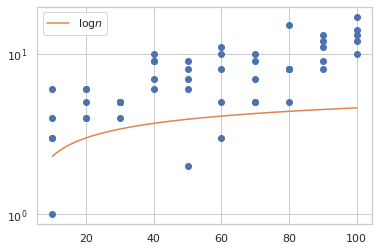

In [ ]:
plt.plot(xs, diametros, 'o')
plt.plot(list(range(10, 101)), list(map(math.log, range(10, 101))), label="$\log n$")
plt.legend(loc="upper left")
plt.yscale("log")

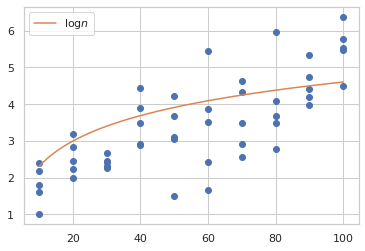

In [ ]:
plt.plot(xs, geo, 'o')
plt.plot(list(range(10, 101)), list(map(math.log, range(10, 101))), label="$\log n$")
plt.legend(loc="upper left")

### Coeficiente de clustering global

Utilizando las redes sintéticas generadas en el paso anterior, comprobaremos que el coeficiente de clustering global de las redes ER crecen según $O(1/n)$.

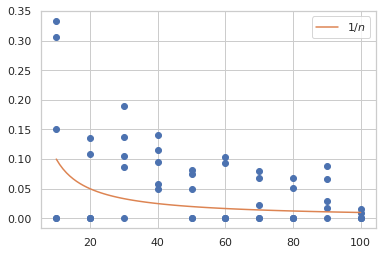

In [ ]:
clust_coefs = list(map(nx.transitivity, redes))
plt.plot(xs, clust_coefs, 'o')
plt.plot(list(range(10, 101)), list(map(lambda x: 1/x, range(10, 101))), label="$1/n$")
plt.legend(loc="upper right")

### Tamaño del componente gigante

Una propiedad muy interesante de este modelo de grafo aleatorio es la aparición repentina, a medida que aumenta el grado medio $c$, de un componente gigante, es decir, un componente cuyo tamaño es proporcional al tamaño de la red $n$. Esta aparición repentina se denomina **transición de fase**.

Nos interesan las transiciones de fase porque encarnan cambios cualitativos en el comportamiento fundamental del sistema modelado. Son efectos intrínsecamente no lineales, en los que **un pequeño cambio en algún parámetro provoca un gran cambio en el comportamiento del sistema**.

Para analizar la aparición de esta componente gigante vamos a representar gráficamente el porcentaje del total de la red que supone la componente gigante con respecto al grado medio $c$ de la red ER.

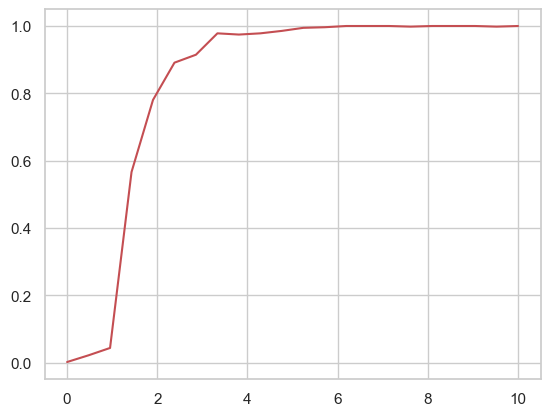

In [22]:
cs = np.linspace(0, 10, 22)
rs_giant = [nx.erdos_renyi_graph(551, c/550.0) for c in cs]
giant_sizes = [g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0]).number_of_nodes()/g.number_of_nodes() for g in rs_giant]

plt.plot(cs, giant_sizes, 'r-')

## Comparando redes reales con ER

La primera red social real que vamos a analizar es la red del [club de karate de Zachary](https://www.journals.uchicago.edu/doi/10.1086/jar.33.4.3629752). Un resumen del origen y contenido de esta red:

> These are data collected from the members of a university karate club by Wayne Zachary in 1977. The ZACHE matrix represents the presence or absence of ties among the members of the club. The ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred). Here's how the Zach C matrix was constructed. A finite set of possible contexts, chosen on the basis of observation of the group, will be used as the domain of a scale variable. Then, the relationship between each pair of individuals in the network is examined against this (nominal) scale. A value, equal to the total number of contexts from the scale in which the two individuals interacted, is then assigned to the corresponding entry in C. Eight contexts are included in the domain of the scale applied to the edges in the karate club network. They are: (1) Association in and between academic classes at the university. (2) Membership in Mr. Hi's private karate studio on the east side of the city where Mr. Hi taught nights as a part-time instructor. (3) Membership in Mr. Hi's private karate studio on the east side of the city, where many of his supporters worked out on weekends. (4) Student teaching at the east-side karate studio referred to in (2). This is different from (2) in that student teachers interacted with each other, but were prohibited from interacting with their sutdents. (5) Interaction at the university rathskeller, located in the same basement as the karate club's workout area. (6) Interaction at a student-oriented bar located across the street from the university campus. (7) Attendance at open karate tournaments held through the area at private karate studios. (8) Attendance at intercollegiate karate tournaments held at local universities. Since both open and intercollegiate tournaments were held on Saturdays, attendance at both was impossible. This scale was applied to the relationships between all pairs of individuals in the karate club, using data compiled over the three years of direct observation of interactions in the club. For each existing edge in E (Figure 2), the pair of individuals involved interacted in at least one of the above eight contexts. The quantified matrix of contexts is given in Figure 3, and is the third component in the capacitated network model (V,E,C).

Esta red social está incluida en la librería **NetworkX**, podemos cargarla con [`karate_club_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html):

In [23]:
karate = nx.karate_club_graph()

Podemos intentar determinar si el comportamiento de los enlaces formados entre alumnos del club de karate han seguido un proceso aleatorio o no. Para ello vamos a calcular el histograma de la probabilidad de grado $Pr(k)$ de la red del club. Si las conexiones hubiesen seguido un proceso aleatorio, el histograma se parecería a una distribución de Poisson con una media similar al grado medio $\left<k\right>$ de nuestra red.

In [25]:
grados_karate = [d for _, d in karate.degree()]
k = np.mean(grados_karate)

print(f"El grado medio <k> es {k}")

El grado medio <k> es 4.588235294117647


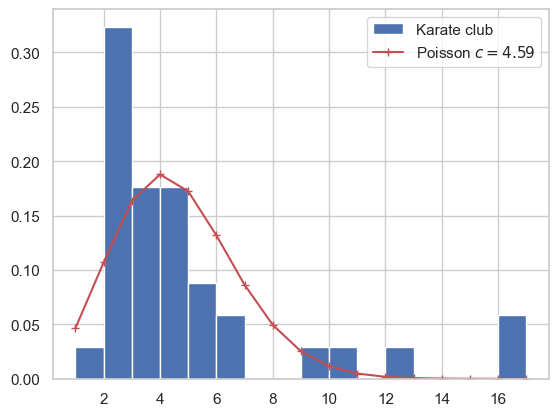

In [ ]:
xs = list(range(min(grados_karate), max(grados_karate)+1))
plt.hist(grados_karate, bins=xs, density=True, label='Karate club')
plt.plot(xs, [stats.poisson.pmf(s, k) for s in xs], 'r+-', label='Poisson $c=4.59$')
plt.legend(loc="upper right")
plt.show()

Se observa que las distribuciones de los grados son algo similares, principalmente en los valores bajos de grado. Sin embargo, en los valores grandes, las distribuciones discrepan. De hecho, la distribución de Poisson da tan poca importancia a esos grados que la probabilidad de que se produzca un vértice con grado $k \geq 16$ es sólo de 0,00000675, es decir, sucederá aproximadamente en 1 de cada 15.000 redes ER con este grado medio. Y en el club de karate, ¡hay 2 vértices de este tipo!

De esta forma podemos descartar nuestra hipótesis de que las conexiones sociales establecidas en el club de karate tenían aleatoriedad.

In [27]:
karate.number_of_nodes()

34

In [28]:
print(f"Coef. de clustering medio de la red de karate: {nx.transitivity(karate)}")
print(f"Coef. de clustering medio de una red ER: {nx.transitivity(nx.erdos_renyi_graph(34, k/33))}")
1/34.0

Coef. de clustering medio de la red de karate: 0.2556818181818182
Coef. de clustering medio de una red ER: 0.09404388714733543


0.029411764705882353

Vamos a probar con otra red compleja: **Political Blogs**, una red dirigida de hipervínculos entre weblogs sobre política estadounidense, recogida en 2005 por Adamic y Glance. Vamos a descargar la red en formato GML desde una URL:

In [33]:
!curl -L https://drive.upm.es/s/pzzovyUHAQGXnuq/download -o polblogs.gml


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  954k  100  954k    0     0  3399k      0 --:--:-- --:--:-- --:--:-- 3398k


In [34]:
blogs = nx.read_gml('polblogs.gml')

print(f"Numero de nodos: {blogs.number_of_nodes()}")
print(f"Numero de aristas: {blogs.number_of_edges()}")

Numero de nodos: 1490
Numero de aristas: 19090


In [35]:
grados_blogs = [d for _, d in blogs.degree()]
k_blogs = np.mean(grados_blogs)

print(f"El grado medio <k> es {k_blogs}")

El grado medio <k> es 25.624161073825505


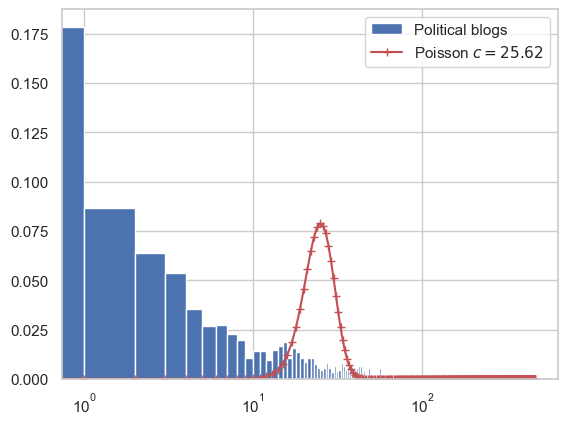

In [ ]:
# Completa el código para obtener el gráfico

Podemos observar, claramente, que los enlaces entre los blogs políticos no son en absoluto fruto del azar, la distribución de probabilidad de sus grados difiere mucho de una Poisson con media $c\approx 25.62$.

# El modelo Barabási–Albert

El **[modelo Barabási-Albert](https://arxiv.org/abs/cond-mat/9910332)** es un algoritmo empleado para generar redes aleatorias complejas **libres de escala (scale-free)** empleando una regla o mecanismo denominado **conexión preferencial (preferential attachment)**. Las redes generadas por este algoritmo poseen una distribución de grado de tipo potencial y se denominan redes libres de escalas. Las redes de este tipo son muy frecuentes en los sistemas elaborados por el ser humano así como en la naturaleza.

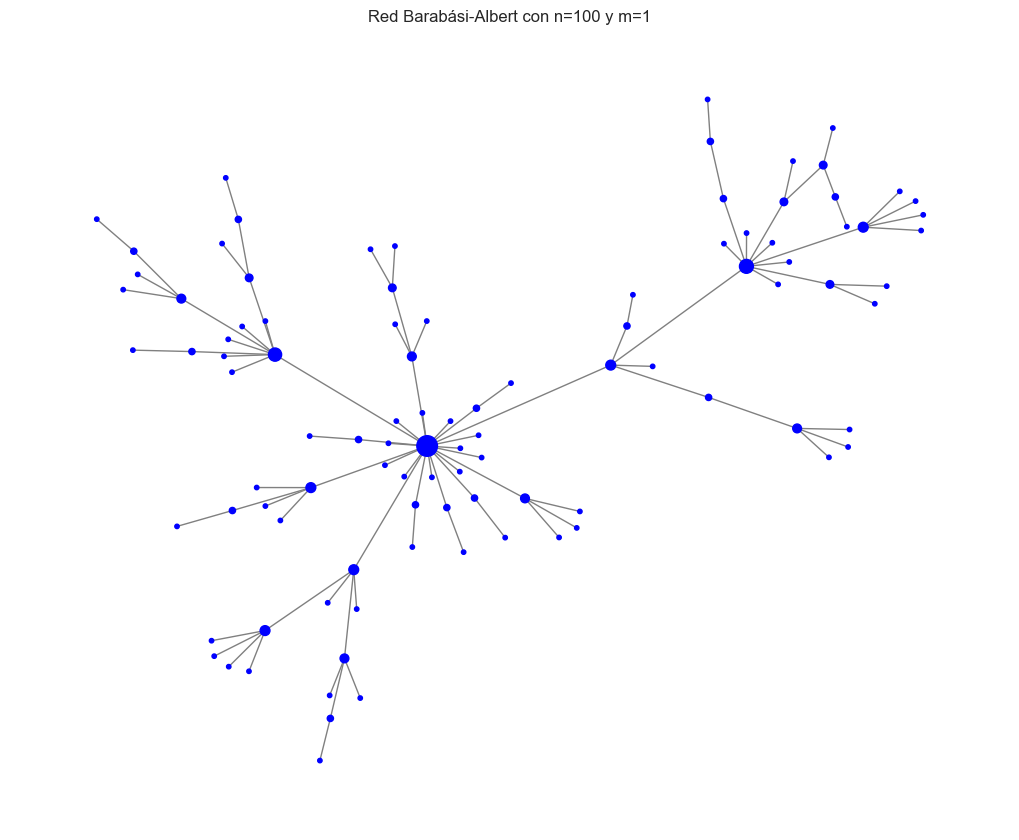

In [3]:
# Crear y mostrar una red Barabási-Albert

N= 100

m= 1

G1 = nx.barabasi_albert_graph(N, m)
pos1 = nx.spring_layout(G1)
node_sizes1 = [d * 10 for n, d in G1.degree()]  # Tamaño de los nodos proporcional al grado
plt.figure(figsize=(10, 8))
nx.draw(G1, pos1, node_size=node_sizes1, with_labels=False, node_color="blue", edge_color="gray")
plt.title(f"Red Barabási-Albert con n={N} y m={m}")
plt.show()


# EJERCICIO

1) Realiza comparaciones de redes aleatorias utilizando los modelos ER y Barábasi-Albert con la red de blogs políticos y alguna de las redes disponibles en la función [`Graph generators`](https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.ego) de la librería NetworkX.

2) En función de los resultados de las métricas obtenidas, ¿qué conjunto de afirmaciones podrías realizar sobre la red real en comparación con la red aleatoria?

3) ¿Hay alguna red aleatoria que sea más adecuada que otra para la que has elegido?



